<!--# STAT 207: Data Science Exploration-->
## Unit 2: Structure of Data Frames

We have seen that pandas data frames have a spreadsheet like structure with the following characteristics:

+ **columns** correspond to different variables and have a single type, either numerical (integer, floating point, complex) or categorical (character strings or boolean).

+ **rows** are labeled by an **index** that identifies individual elements, which may be subjects, different time points, subject visits at different time points, products, or any other basic unit under study.

This basic spreadsheet structure is made abundently clear by how we can use the pandas .read_csv function to read an Excel-style comma separated file directly into a pandas data frame.

We have also seen that there are other functions that operate on data frames either to extract their attributes (e.g. the pandas .head() function) or perform other operations like summing, averaging or graphing.

In this section we delve further into the data frame structure, investigating:

+ How to build up data frames from simpler objects;

+ How to import and export data files;

+ How to extract subsets of the data and refer to individual elements in a data frame; 

+ How to add new data;

+ How to combine data from multiple sources;

+ How to sort data by specific variables in the data frame.

+ How missing data are represented, and how we can process them.

### Building a data frame from scratch

In [1]:
import pandas as pd

In [2]:
courses = ['cs105', 'stat107', 'stat207', 'adv307', 'hist407']
enrollment = [345, 197, 53, 38, 26]
print(courses, enrollment)

['cs105', 'stat107', 'stat207', 'adv307', 'hist407'] [345, 197, 53, 38, 26]


We can bundle these arrays into a data frame as in the example below. Pay close attention to the different types of brackets.

+ '( )' enclose function arguments
+ '[ ]' enclose elements in a *list* or *array*
+ '{ }' enclose elements in a *dictionary* {'key1': value1, 'key2': value2, ...}

In [3]:
littledf = pd.DataFrame({'course': courses, 'enrolled': enrollment})
littledf

,course,enrolled
0,cs105,345
1,stat107,197
2,stat207,53
3,adv307,38
4,hist407,26


In [4]:
littledf['college'] = ['ENGR', 'LAS', 'LAS', 'MEDIA', 'LAS']
littledf

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS


### Reading external files into data frames

Often data reside in a structured file such as a comma separated variables (.csv) file, tab separated file, or Excel spreadsheet, and we wish to read the data into Python for data processing and analytics. For example, in the same folder as this notebook, the file 'USmelanoma.csv' contains state level summary data on male melanoma mortality rates (per million) from 1950-1967. The first few lines of the file look like this:

    "state","mortality","latitude","longitude","ocean"
    "Alabama",219,33,87,"yes"
    "Arizona",160,34.5,112,"no"
    "Arkansas",170,35,92.5,"no"
    "California",182,37.5,119.5,"yes"
    "Colorado",149,39,105.5,"no"
    ...

Using the pandas read_csv command we can read this into a data frame as follows, assuming we previously imported the pandas library as 'pd':

In [5]:
df = pd.read_csv('USmelanoma.csv')

Here are the first few lines of the imported data:

In [6]:
df.head(6)

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,-87.0,1
1,Arizona,160,34.5,-112.0,0
2,Arkansas,170,35.0,-92.5,0
3,California,182,37.5,-119.5,1
4,Colorado,149,39.0,-105.5,0
5,Connecticut,159,41.8,-72.8,1


Note the .function(arguments) syntax, which is characteristic of many operations on pandas data objects.

### Exporting data frames to external files

The reverse operation is to write an internal data frame to an external file, perhaps after some data processing to merge data from multiple sources. Here we export the 'littledf' data to an external csv file using the pandas.DataFrame.to_csv function.

In [7]:
littledf.to_csv('courses.csv')

### Conditional extraction of data subsets

How can we extract data for LAS courses only? First, observe how we can check each course for whether or not it is an LAS course with an array operation:

In [8]:
littledf['college']=='LAS'

0    False
1     True
2     True
3    False
4     True
Name: college, dtype: bool

The data frame can take this boolean array as a condition for selecting rows:

In [9]:
littledf[littledf['college']=='LAS']

,course,enrolled,college
1,stat107,197,LAS
2,stat207,53,LAS
4,hist407,26,LAS


What if we only want the enrollments of the LAS courses?

In [10]:
littledf[littledf['college']=='LAS']['enrolled']

1    197
2     53
4     26
Name: enrolled, dtype: int64

Why does this work? Extracting the three row data frame for LAS courses only gives us a shorter three-column data frame. We can refer to the 'enrolled' column of this short data frame in the same way as for the taller original.

By similar logic, we could have gotten to the same result by a different path as follows:

In [11]:
littledf['enrolled'][littledf['college']=='LAS']

1    197
2     53
4     26
Name: enrolled, dtype: int64

How about a different type of condition, like extracting all the courses with enrollments of at least 50?

In [12]:
littledf[littledf['enrolled']>=50]

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS


Or extracting the courses with enrollments less than 50?

In [13]:
littledf[littledf['enrolled']<50]

,course,enrolled,college
3,adv307,38,MEDIA
4,hist407,26,LAS


We can extract the record corresponding to a particular course:

In [14]:
littledf[littledf['course']=='adv307']

,course,enrolled,college
3,adv307,38,MEDIA


### Pandas functions and data subsets

The subsetted data inherits data frame features. Therefore in many cases we can apply pandas functions to the extracted data. For example, suppose we want the total enrollment in the LAS classes. Below is one way to get it, using the .sum() function. It is good practice to label results, so we use a print statement do do that here.

In [15]:
print("Enrollment = ",
      littledf[littledf['college']=='LAS']['enrolled'].sum()
     )

Enrollment =  276


We can also use pandas functions to define subsets. Let's find the maximum course enrollment.

In [16]:
print("Maximum Enrollment = ", littledf['enrolled'].max())

Maximum Enrollment =  345


Which course(s) had the maximum enrollment?

In [17]:
littledf[littledf['enrolled']==littledf['enrolled'].min()]

,course,enrolled,college
4,hist407,26,LAS


### Data subset slicing by index and column number

Using the **.iloc** (index location) attribute, we can refer to specific elements or "slices" of elements in the data frame.

Here, again, is our sample data frame in full:

In [18]:
littledf

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS


In this 5 x 3 array the rows are numbered 0, 1, ..., 4 and the columns are numbered 0,1,2. We can extract the upper left element using .iloc:

In [19]:
littledf.iloc[0,0]

'cs105'

We extract the element in row 3, column 2 as:

In [20]:
littledf.iloc[3,2]

'MEDIA'

We can extract a slice of more than one element using the sequence notation i:j:k  to refer to indices running from i to j-k using step-size k. If we leave out the step it is assumed k=1. If we leave out the range elements the sequence covers the whole range. 

Here's an example where we can extract the middle three rows of the data frame. Note that "1:4" results in the inclusion of rows 1, 2 and 3 but not 4!

In [21]:
littledf.iloc[1:4,:]

,course,enrolled,college
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA


If we wanted to include rows 0-3 we can use the sequence ":4", which includes all rows before the row with index=4.

In [22]:
littledf.iloc[:4,:]

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA


If, on the other hand, we wished to include all rows after rows 0 and 1 the sequence "2:" will do this.

In [23]:
littledf.iloc[2:,:]

,course,enrolled,college
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS


In [24]:
littledf.iloc[[0,1,2,4],:]

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
4,hist407,26,LAS


### Adding data: concatenation

Suppose we had more enrollment data to add to the data frame, for additional courses. We can use the pandas **concat** funtion to combine the original data frame with a new data frame containing the additional records. Here we create a new data frame with the hypothetical new data.

In [25]:
moredf = pd.DataFrame({'course': ['math277', 'is417'], 
                       'enrolled': [41, 43], 
                       'college': ['LAS', 'IS']})

Here are the original data frame and the data we wish to add:

In [26]:
display(littledf, moredf)

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS


,course,enrolled,college
0,math277,41,LAS
1,is417,43,IS


Next we combine them, and specify to ignore the original index values and create a new index for the combined data.

In [27]:
fulldf = pd.concat([littledf, moredf], ignore_index=True)
#fulldf = pd.concat([littledf, moredf])  # uncomment to see the difference
fulldf

,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS
5,math277,41,LAS
6,is417,43,IS


A quick way to add new records is using the **append()** function.

In [28]:
newdf = pd.DataFrame({'course': ['badm210'], 
                      'enrolled': [215], 
                      'college': ['BUSN']})
updateddf = fulldf.append(newdf, ignore_index=True)
display(newdf, updateddf)

,course,enrolled,college
0,badm210,215,BUSN


,course,enrolled,college
0,cs105,345,ENGR
1,stat107,197,LAS
2,stat207,53,LAS
3,adv307,38,MEDIA
4,hist407,26,LAS
5,math277,41,LAS
6,is417,43,IS
7,badm210,215,BUSN


### Merging data frames

Another common scenario is to have more than one source of data on different variables, and we wish to combine data sets for further analysis. As an example, suppose in the previous course list example we had another source with the credit hours for each class. We'd like to add this information.

In [29]:
creditdf = pd.DataFrame({'course': ['adv307', 'cs105', 'stat107', 'stat207', 
                                    'hist407', 'math277', 'is417', 'badm210'], 
                         'credit': [3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0]})
creditdf

,course,credit
0,adv307,3.0
1,cs105,3.0
2,stat107,4.0
3,stat207,3.0
4,hist407,4.0
5,math277,5.0
6,is417,3.0
7,badm210,3.0


In this case, we can do a one-to-one join between the two data frames using the pandas **merge()** function. Notice that the order of the courses does not need to be the same; the records are matched based on the shared course name.

In [30]:
fullerdf = pd.merge(updateddf, creditdf)
fullerdf

,course,enrolled,college,credit
0,cs105,345,ENGR,3.0
1,stat107,197,LAS,4.0
2,stat207,53,LAS,3.0
3,adv307,38,MEDIA,3.0
4,hist407,26,LAS,4.0
5,math277,41,LAS,5.0
6,is417,43,IS,3.0
7,badm210,215,BUSN,3.0


Often the two data sources will not be in one-to-one correspondence between their records. Then we might need to perform and "many-to-one" merge. 

**Example:** In one data source we have courses and section enrollments. In the other data source we have courses and credit hours. Let's combine them. First we'll create a data frame with the section information.

In [31]:
courses = ['cs105', 'cs105', 'stat107', 'badm210', 'badm210']
sections = ['A', 'B', 'A', 'A', 'B']
enrollments = [345, 201, 197, 215, 197]
sectdf = pd.DataFrame({'course': courses, 
                       'section': sections, 
                       'enrolled': enrollments})
sectdf

,course,section,enrolled
0,cs105,A,345
1,cs105,B,201
2,stat107,A,197
3,badm210,A,215
4,badm210,B,197


We'd like to merge this with the credit information:

In [32]:
creditdf

,course,credit
0,adv307,3.0
1,cs105,3.0
2,stat107,4.0
3,stat207,3.0
4,hist407,4.0
5,math277,5.0
6,is417,3.0
7,badm210,3.0


We can try a "default" merge and see what we get:

In [33]:
pd.merge(sectdf, creditdf)

,course,section,enrolled,credit
0,cs105,A,345,3.0
1,cs105,B,201,3.0
2,stat107,A,197,4.0
3,badm210,A,215,3.0
4,badm210,B,197,3.0


Did it work? Yes, in the sense that all course sections in the first data frame have now been assigned credit hours. Any course that appears in both data sources gets matched. The courses missing from one or the other we not included.

In some cases we need to specify which variable to use as the matching **key** using the **on=** option:

In [34]:
pd.merge(sectdf, creditdf, on='course')

,course,section,enrolled,credit
0,cs105,A,345,3.0
1,cs105,B,201,3.0
2,stat107,A,197,4.0
3,badm210,A,215,3.0
4,badm210,B,197,3.0


### Sorting data by specific columns in the Data Frame

In the examples we've been considering, the course names are in no particular order. What if we want the courses to be in alphanumeric order? pandas has a function for that: **.sort_values**. For the syntax see:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

To select a specific column on which to sort we use the **by=** option as in the following example:

In [35]:
creditdf

,course,credit
0,adv307,3.0
1,cs105,3.0
2,stat107,4.0
3,stat207,3.0
4,hist407,4.0
5,math277,5.0
6,is417,3.0
7,badm210,3.0


In [36]:
creditdf.sort_values(by='course')

,course,credit
0,adv307,3.0
7,badm210,3.0
1,cs105,3.0
4,hist407,4.0
6,is417,3.0
5,math277,5.0
2,stat107,4.0
3,stat207,3.0


**Remarks:** 

1. We can specify more than one variable for sorting, and we can also select various other options such as "ascending=False" (default is "ascending=True"), where to put NaNs in the ordering ("na_position='last'), and whether to sort in-place (overwriting the original object).


2. This operation did **not** replace the original data with sorted data, it merely displayed the sorted data. If we wanted to save this we assign to a new pandas object, or we can sort "in place" as illustrated below.

Here we see the effect of in-place sorting.

In [37]:
creditdf.sort_values(by='course', inplace=True)  # sorting in place and replacing original

In [38]:
creditdf   # now the original is in sorted order

,course,credit
0,adv307,3.0
7,badm210,3.0
1,cs105,3.0
4,hist407,4.0
6,is417,3.0
5,math277,5.0
2,stat107,4.0
3,stat207,3.0


As a different application, here we sort class sections by enrollment, from highest to lowest.

In [39]:
sectdf.sort_values(by='enrolled', ascending=False)

,course,section,enrolled
0,cs105,A,345
3,badm210,A,215
1,cs105,B,201
2,stat107,A,197
4,badm210,B,197


### Application: compare melanoma mortality rates across different states

Earlier we imported 'USmelanoma.csv' into the data frame 'df'. 

In [40]:
df.head()

,state,mortality,latitude,longitude,ocean
0,Alabama,219,33.0,-87.0,1
1,Arizona,160,34.5,-112.0,0
2,Arkansas,170,35.0,-92.5,0
3,California,182,37.5,-119.5,1
4,Colorado,149,39.0,-105.5,0


Let's plot mortality rates across different states, in alphabetical order.

In [41]:
import matplotlib.pyplot as plt

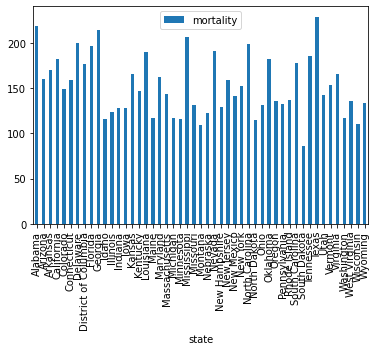

In [42]:
df.plot.bar(x='state', y='mortality')
plt.show()

It will be easier to compare if we sort by mortality rates.

In [43]:
dfsorted = df.sort_values(by='mortality', ascending=False)
dfsorted.head()

,state,mortality,latitude,longitude,ocean
41,Texas,229,31.5,-98.0,1
0,Alabama,219,33.0,-87.0,1
9,Georgia,214,33.0,-83.5,1
22,Mississippi,207,32.8,-90.0,1
6,Delaware,200,39.0,-75.5,1


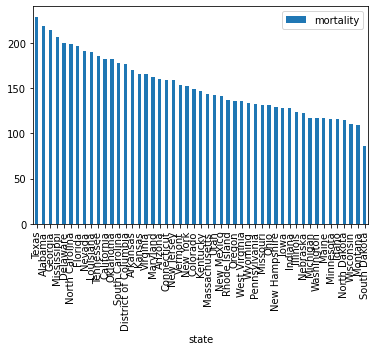

In [44]:
dfsorted.plot.bar(x='state', y='mortality')
plt.show()

### Handling missing data

Missing data are very common in real data applications. How can we handle them at a basic level? To illustrate, consider the hypothetical section enrollment data. We'll make one element go missing.

In [45]:
tmp = sectdf  # copy of data frame
tmp

,course,section,enrolled
0,cs105,A,345
1,cs105,B,201
2,stat107,A,197
3,badm210,A,215
4,badm210,B,197


In [46]:
tmp['enrolled'][4]  # Access the enrollment for badm210 section B

197

In [47]:
tmp.iloc[4,2] # another way to access

197

In [48]:
tmp.iloc[4,2] = None   # coding this element as missing
tmp

,course,section,enrolled
0,cs105,A,345.0
1,cs105,B,201.0
2,stat107,A,197.0
3,badm210,A,215.0
4,badm210,B,NaN


We see that the missing value is encoded as NaN  (not a number). 

What if we wanted to sort by enrollment? We need to specify whether missing values go first or last on the list.

In [49]:
tmp.sort_values(by='enrolled', na_position='first')

,course,section,enrolled
4,badm210,B,NaN
2,stat107,A,197.0
1,cs105,B,201.0
3,badm210,A,215.0
0,cs105,A,345.0


By default, many functions will skip data with missing values. Often this makes sense, but not always!

In [50]:
tmp['enrolled'].sum()

958.0

The 'DataFrame.isna' function can scan a data frame for missing values. 'DataFrame.notna' scans for non-missing values.

In [51]:
tmp.isna()

,course,section,enrolled
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,True


If we want to analyze only the data with complete information the 'DataFrame.dropna' function can extract the complete data for us.

In [52]:
tmp.dropna()

,course,section,enrolled
0,cs105,A,345.0
1,cs105,B,201.0
2,stat107,A,197.0
3,badm210,A,215.0


---
STAT 207, Douglas Simpson, University of Illinois at Urbana-Champaign